Path found: [(0, 0), (2, 0), (4, 0), (4, 2), (5, 2)]


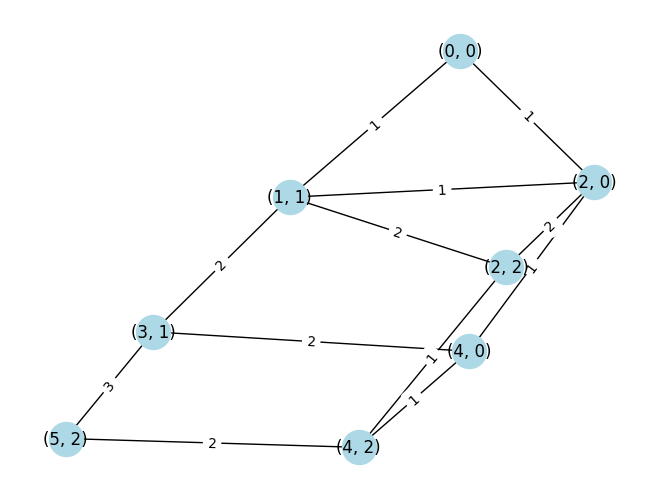

In [1]:
import math
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def euclidean_distance(node1, node2):
    x1, y1 = node1
    x2, y2 = node2
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def astar(graph, start, goal):
    open_set = []
    closed_set = set()

    # Create dictionaries to store g_scores and f_scores for each node
    g_scores = {node: float('inf') for node in graph}
    f_scores = {node: float('inf') for node in graph}
    came_from = {}

    

    # Initialize the start node
    g_scores[start] = 0
    f_scores[start] = euclidean_distance(start, goal)
    heapq.heappush(open_set, (f_scores[start], start))

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            return reconstruct_path(start, goal, came_from)

        closed_set.add(current)

        for neighbor in graph[current]:
            if neighbor in closed_set:
                continue

            tentative_g_score = g_scores[current] + graph[current][neighbor]
            if tentative_g_score < g_scores[neighbor]:
                g_scores[neighbor] = tentative_g_score
                f_scores[neighbor] = tentative_g_score + euclidean_distance(neighbor, goal)
                heapq.heappush(open_set, (f_scores[neighbor], neighbor))
                came_from[neighbor] = current
    
    print("Final f scores:")
    for node in f_scores:
        print(node, ": ", f_scores[node])
        
    return None

def reconstruct_path(start, goal, came_from):
    current = goal
    path = [current]
    while current != start:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path

graph = {
    (0, 0): {(1, 1): 1, (2, 0): 1},
    (1, 1): {(0, 0): 1, (2, 2): 2, (2, 0): 1, (3, 1): 2},
    (2, 0): {(0, 0): 1, (1, 1): 1, (2, 2): 2, (4, 0): 1},
    (2, 2): {(1, 1): 2, (4, 2): 1},
    (3, 1): {(1, 1): 2, (4, 0): 2, (5, 2): 3},
    (4, 0): {(2, 0): 1, (3, 1): 2, (4, 2): 1},
    (4, 2): {(2, 2): 1, (4, 0): 1, (5, 2): 2},
    (5, 2): {(3, 1): 3, (4, 2): 2}
}

start_node = (0, 0)
goal_node = (5, 2)

# Perform A* search
path = astar(graph, start_node, goal_node)
if path:
    print("Path found:", path)
else:
    print("Path not found.")


# Visualize the graph
G = nx.Graph()
for node in graph:
    G.add_node(node)
    for neighbor in graph[node]:
        G.add_edge(node, neighbor, weight=graph[node][neighbor])

pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=600, font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()
